Facultad de Ciencias Exactas, Ingeniería y Agrimensura - Tecnicatura Universitaria en Inteligencia Artificial

Aprendizaje Automático I

Trabajo Práctico 1

Integrantes:
- Breccia, Lucía
- Justo, Florencia

## Importamos librerías

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, RidgeCV, ElasticNetCV, LassoCV
from sklearn.metrics import mean_squared_error

## Lectura y manipulación del dataset

In [2]:
precios_casas = pd.read_csv("house-prices-tp.csv")
precios_casas
# Leemos y visualizamos el dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.071510,0.000000,4.490000,0.0,0.449,6.121000,56.8,3.747600,3.000000,247.000000,18.500000,395.150000,8.440000,22.200000
1,0.082650,0.000000,13.920000,0.0,0.437,6.127000,18.4,5.502700,4.000000,289.000000,16.000000,396.900000,8.580000,23.900000
2,0.128160,12.500000,6.070000,0.0,0.409,5.885000,33.0,6.498000,4.000000,345.000000,18.900000,396.900000,8.790000,20.900000
3,0.088730,21.000000,5.640000,0.0,0.439,5.963000,45.7,6.814700,4.000000,243.000000,16.800000,395.560000,13.450000,19.700000
4,0.114320,0.000000,8.560000,0.0,0.520,6.781000,71.3,2.856100,5.000000,384.000000,20.900000,395.580000,7.670000,26.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,0.082440,30.000000,4.930000,0.0,0.428,6.481000,18.5,6.189900,6.000000,300.000000,16.600000,379.410000,6.360000,23.700000
552,0.475470,0.000000,9.900000,0.0,0.544,6.113000,58.8,4.001900,4.000000,304.000000,18.400000,396.230000,12.730000,21.000000
553,0.249800,0.000000,21.890000,0.0,0.624,5.857000,98.2,1.668600,4.000000,437.000000,21.200000,392.040000,21.320000,13.300000
554,32.504013,6.528591,8.937346,1.0,NaN,4.016588,NaN,5.243777,20.416908,197.236588,19.639059,6.267059,7.033962,23.028798


In [3]:
# Eliminamos aquellas filas en donde la variable respuesta, MEDV, presenta valores nulos, ya que no son útiles para el entrenamiento ni para el testeo:
precios_casas1 = precios_casas.dropna(subset=['MEDV'])
precios_casas1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.071510,0.000000,4.490000,0.0,0.449,6.121000,56.8,3.747600,3.000000,247.000000,18.500000,395.150000,8.440000,22.200000
1,0.082650,0.000000,13.920000,0.0,0.437,6.127000,18.4,5.502700,4.000000,289.000000,16.000000,396.900000,8.580000,23.900000
2,0.128160,12.500000,6.070000,0.0,0.409,5.885000,33.0,6.498000,4.000000,345.000000,18.900000,396.900000,8.790000,20.900000
3,0.088730,21.000000,5.640000,0.0,0.439,5.963000,45.7,6.814700,4.000000,243.000000,16.800000,395.560000,13.450000,19.700000
4,0.114320,0.000000,8.560000,0.0,0.520,6.781000,71.3,2.856100,5.000000,384.000000,20.900000,395.580000,7.670000,26.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,0.082440,30.000000,4.930000,0.0,0.428,6.481000,18.5,6.189900,6.000000,300.000000,16.600000,379.410000,6.360000,23.700000
552,0.475470,0.000000,9.900000,0.0,0.544,6.113000,58.8,4.001900,4.000000,304.000000,18.400000,396.230000,12.730000,21.000000
553,0.249800,0.000000,21.890000,0.0,0.624,5.857000,98.2,1.668600,4.000000,437.000000,21.200000,392.040000,21.320000,13.300000
554,32.504013,6.528591,8.937346,1.0,NaN,4.016588,NaN,5.243777,20.416908,197.236588,19.639059,6.267059,7.033962,23.028798


## División del conjunto de datos

In [4]:
# Separamos los datos para entrenamiento y prueba.
X = precios_casas1.drop('MEDV', axis=1)
y = precios_casas1['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape  #Vemos los tamaños obtenidos

((428, 13), (107, 13), (428,), (107,))

## Análisis descriptivo

In [6]:
X_train.dtypes #Vemos qué tipos de datos contiene el dataset.

,0
CRIM,float64
ZN,float64
INDUS,float64
CHAS,float64
NOX,float64
RM,float64
AGE,float64
DIS,float64
RAD,float64
TAX,float64


Se tiene en cuenta que CHAS es una variable categórica, ya codificada (toma el valor 1 si la vivienda limita con el río y 0 de lo contrario). Esta información fue brindada junto con el dataset.

In [7]:
# Obtenemos estadísticas de cada variable:
estadisticas_resumen = X_train.describe()
print(estadisticas_resumen)

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  420.000000  419.000000  425.000000  420.000000  419.000000  421.000000   
mean     5.185704   12.663532   11.317757    0.069048    0.560602    6.272484   
std     12.221977   24.773329    6.927496    0.253837    0.119720    0.760823   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.081437    0.000000    5.130000    0.000000    0.453000    5.870000   
50%      0.327625    0.000000    9.900000    0.000000    0.538000    6.193000   
75%      4.818015   20.000000   18.100000    0.000000    0.647000    6.649000   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  421.000000  425.000000  419.000000  421.000000  423.000000  421.000000   
mean    67.715061    3.876906    9.906882  416.125557   18.397472  348.483764   
std     28.911930    2.2022

In [8]:
# Calculamos la razón entre la cantidad de valores nulos y la cantidad total de datos, por cada variable:
100*X_train.isna().sum()/X_train.shape[0]

,0
CRIM,1.869159
ZN,2.102804
INDUS,0.700935
CHAS,1.869159
NOX,2.102804
RM,1.635514
AGE,1.635514
DIS,0.700935
RAD,2.102804
TAX,1.635514


In [9]:
#Vemos cantidad de filas que tienen al menos un dato faltante
filas_con_nulos = pd.DataFrame(X_train[X_train.isnull().any(axis=1)])
filas_con_nulos.shape[0]


22

Al analizar los resultados anteriores, se nota que los porcentajes de valores nulos por variable son todos menores al 3%. Además al contar las filas que tienen al menos un dato nulo, obtuvimos un total de 22, lo que representa alrededor de un 5% de la cantidad de registros de X_train (428 en total). Por estos motivos, se decide eliminar las filas que presentan datos faltantes.

In [10]:
# Eliminación de datos faltantes en X_train
X_train_d = X_train.dropna()
X_train_d

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
290,0.17899,0.0,9.69,0.0,0.585,5.670,28.8,2.7986,6.0,391.0,19.2,393.29,17.60
357,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88
438,0.11027,25.0,5.13,0.0,0.453,6.456,67.8,7.2255,8.0,284.0,19.7,396.90,6.73
153,14.42080,0.0,18.10,0.0,0.740,6.461,93.3,2.0026,24.0,666.0,20.2,27.49,18.05
197,0.03584,80.0,3.37,0.0,0.398,6.290,17.8,6.6115,4.0,337.0,16.1,396.90,4.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,8.79212,0.0,18.10,0.0,0.584,5.565,70.6,2.0635,24.0,666.0,20.2,3.65,17.16
110,9.23230,0.0,18.10,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53
276,8.49213,0.0,18.10,0.0,0.584,6.348,86.1,2.0527,24.0,666.0,20.2,83.45,17.64
453,0.04379,80.0,3.37,0.0,0.398,5.787,31.1,6.6115,4.0,337.0,16.1,396.90,10.24


In [11]:
#Nos guardamos los índices de las columnas que tienen datos nulos
indices = filas_con_nulos.index.tolist()

In [40]:
# Eliminación de las filas correspondientes en y_train
y_train_d = y_train.drop(labels=indices)

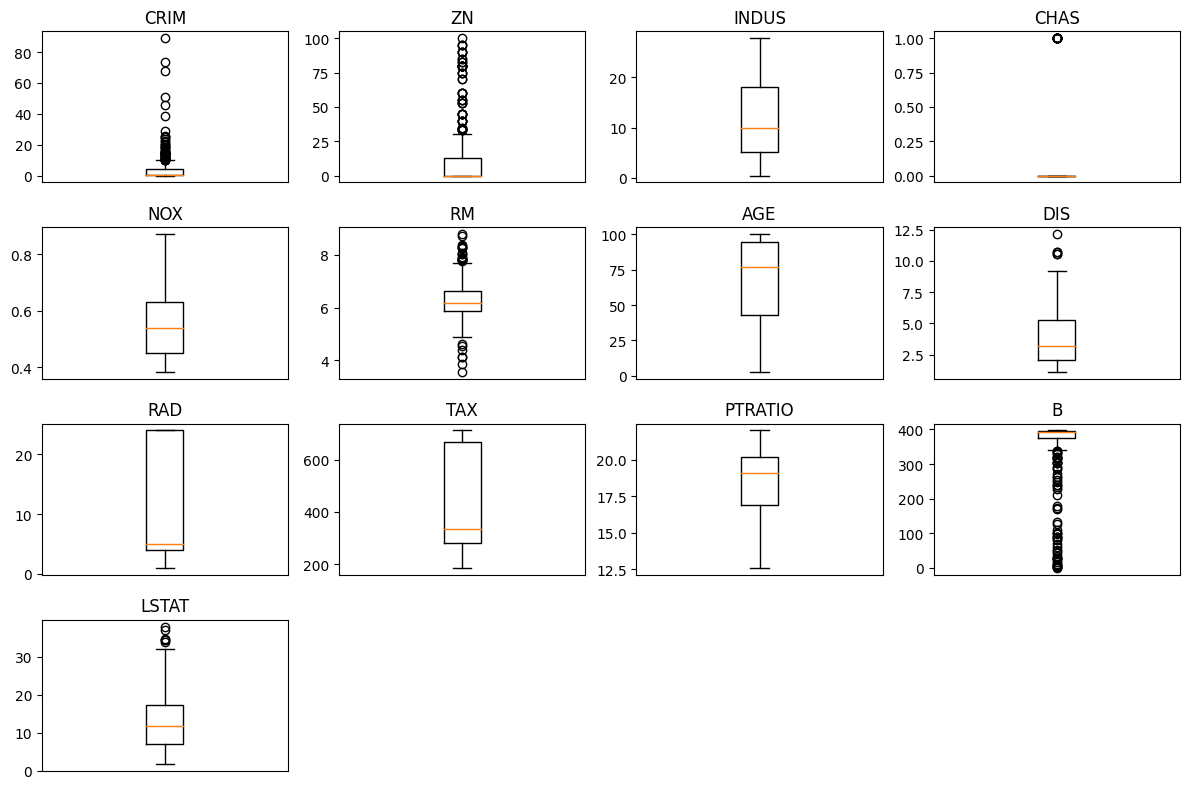

In [13]:
# Boxplot para cada variable.
plt.figure(figsize=(12, 8))
for i, column in enumerate(X_train_d.columns):
    plt.subplot(4, 4, i+1)
    plt.boxplot(X_train_d[column])
    plt.title(column)
    plt.xticks([])  # Eliminar marcas en el eje x
plt.tight_layout()
plt.show()

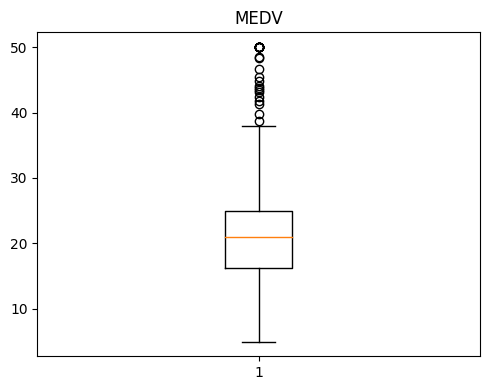

In [14]:
plt.figure(figsize=(5, 4))
plt.boxplot(y_train_d)
plt.title("MEDV")
plt.tight_layout()
plt.show()

Se observa que las variables CRIM, ZN, RM, B y MEDV tienen gran cantidad de outliers.
Se tiene presente que por información brindada junto con el dataset, se sabe que CHAS es variable dummy, tomando los valores 1 y 0, si el tramo limita con el río o no, respectivamente.


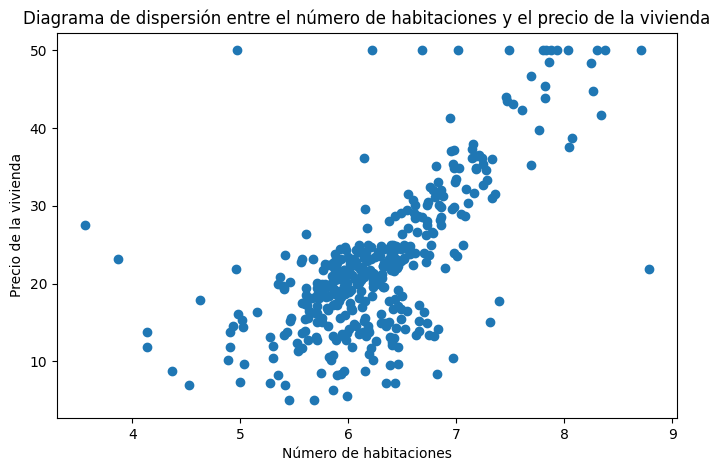

In [15]:
# Gráfico de dispersión entre RM y MEDV
plt.figure(figsize=(8, 5))  # Tamaño de la figura
plt.scatter(X_train_d['RM'], y_train_d)
plt.title('Diagrama de dispersión entre el número de habitaciones y el precio de la vivienda')
plt.xlabel('Número de habitaciones')
plt.ylabel('Precio de la vivienda')
plt.show()

A grandes rasgos, se observa que a mayor número de habitaciones, mayor es el valor mediano de la vivienda. Aun así, se presentan algunos puntos en donde no se cumple la relación mencionada. Se puede pensar que hay otros factores que influyen en el precio.

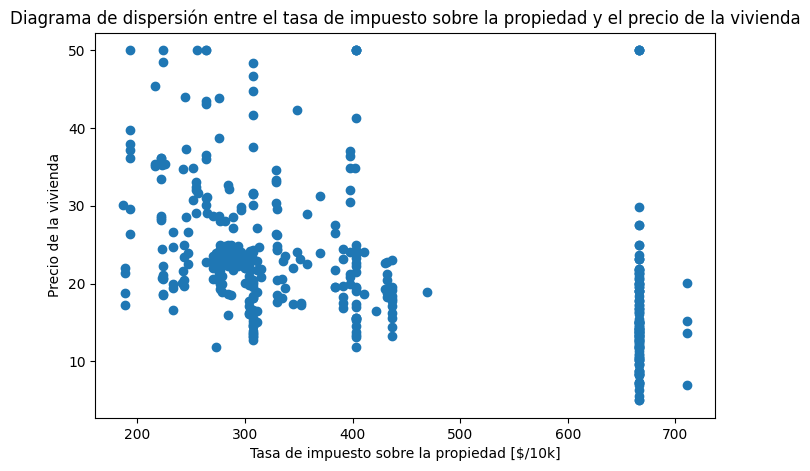

In [16]:
# Gráfico de dispersión entre TAX y MEDV
plt.figure(figsize=(8, 5))
plt.scatter(X_train_d['TAX'], y_train_d)
plt.title('Diagrama de dispersión entre el tasa de impuesto sobre la propiedad y el precio de la vivienda')
plt.xlabel('Tasa de impuesto sobre la propiedad [$/10k]')
plt.ylabel('Precio de la vivienda')
plt.show()

De este diagrama, se puede ver que no hay una clara relación entre las variables implicadas. Se puede mencionar que para ciertas tasas de impuestos muy altas, hay viviendas de bajo precio (en comparación con las demás) y viceversa. También se observa que no hay registros de tasas de impuestos entre 500 y 650.

<ipython-input-17-7c896877d2c7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CHAS', y=y_train_d, data=X_train_d, palette='pastel')


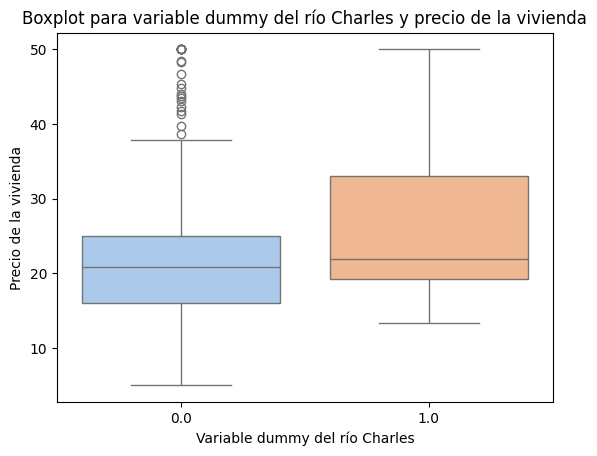

In [17]:
# Boxplot para CHAS y MEDV
sns.boxplot(x='CHAS', y=y_train_d, data=X_train_d, palette='pastel')
plt.title('Boxplot para variable dummy del río Charles y precio de la vivienda')
plt.xlabel('Variable dummy del río Charles')
plt.ylabel('Precio de la vivienda')
plt.show()

Considerando que el valor 1 representa que la propiedad limita con el río y el valor 0, lo contrario, se observa en estos gráficos que la mediana de los precios de viviendas junto al río es levemente mayor que la mediana de los precios de aquellas que se encuentran más lejos. A su vez, el precio mínimo de las viviendas que están junto al río se encuentra bastante por encima del mínimo para las que no.
Los precios de las casas cercanas al río se encuentran menos dispersos, con un rango intercuartil mayor.

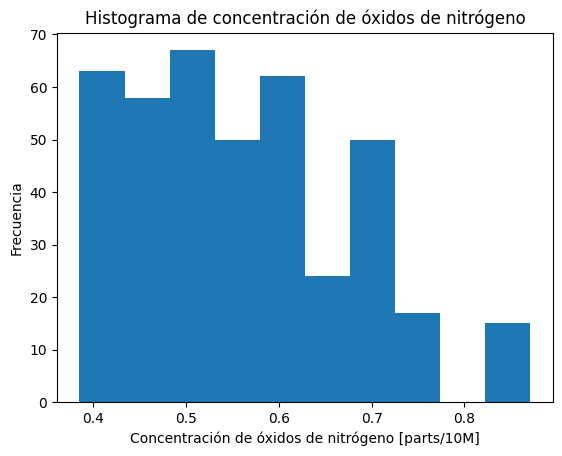

In [18]:
# Histograma de porcentaje de población de menor estatus socioeconómico
plt.hist(X_train_d['NOX'], bins=10)
plt.title('Histograma de concentración de óxidos de nitrógeno')
plt.xlabel('Concentración de óxidos de nitrógeno [parts/10M]')
plt.ylabel('Frecuencia')
plt.show()

En este histograma, se nota que las concentraciones de óxido de nitrógeno de alrededor de 0,5 partes por 10 millones, son las más frecuentes en las zonas de las viviendas registradas. Se observa que son pocas las viviendas con concentraciones mayores a 0,75 partes por 10 millones.

In [19]:
df_train = pd.merge(X_train_d, y_train_d, left_index=True, right_index=True)

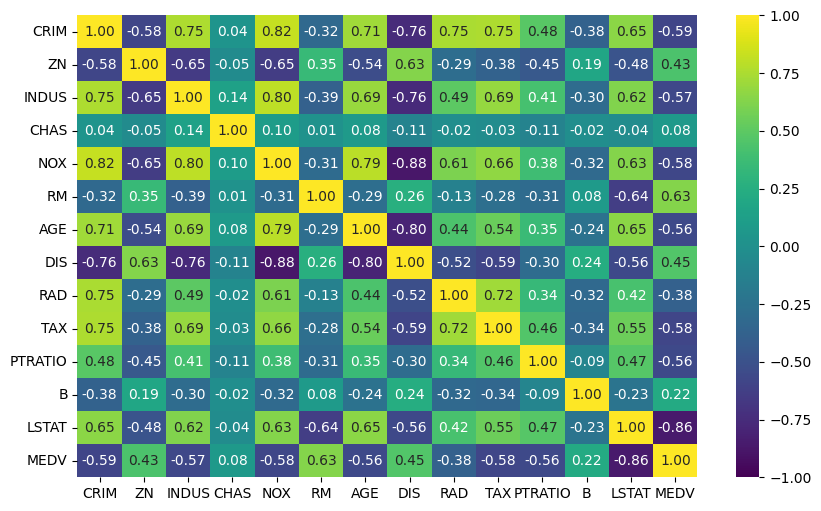

In [20]:
# Matriz de correlación de variables
plt.figure(figsize=(10, 6))
sns.heatmap (df_train.corr(method = 'spearman'), annot = True, cmap='viridis', fmt=".2f", vmin=-1, vmax=1)
plt.show()

A partir del mapa de calor se pueden notar algunas variables que están fuertemente relacionadas linealmente, como son:

NOX y DIS (coef. -0.88)

MEDV y LSTAT (coef. -0.86)

Podemos considerar una relación lineal moderada para:

NOX y CRIM (coef. 0.82)

NOX y INDUS (coef. 0.80)

DIS y AGE (coef. -0.80)

NOX y AGE (coef. 0.79)


In [21]:
# Escalamos datos con RobustScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_d)
X_test_scaled = scaler.transform(X_test)

Utilizamos el escalado robusto ya que es menos sensible a los valores atípicos dado que visualizamos previamente la presencia de outliers en varias de nuestras variables. Este método utiliza la mediana y el rango intercuartil para escalar los datos.

In [22]:
# Miramos las primeras 5 filas del dataframe antes de escalar los datos y luego las 5 primeras filas de la matriz después de escalar
print("Antes del escalado:")
print(X_train_d.head())
print("Después del escalado:")
print(X_train_scaled[:5, :])

Antes del escalado:
         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS   RAD    TAX  \
290   0.17899   0.0   9.69   0.0  0.585  5.670  28.8  2.7986   6.0  391.0   
357   0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050   1.0  273.0   
438   0.11027  25.0   5.13   0.0  0.453  6.456  67.8  7.2255   8.0  284.0   
153  14.42080   0.0  18.10   0.0  0.740  6.461  93.3  2.0026  24.0  666.0   
197   0.03584  80.0   3.37   0.0  0.398  6.290  17.8  6.6115   4.0  337.0   

     PTRATIO       B  LSTAT  
290     19.2  393.29  17.60  
357     21.0  396.90   7.88  
438     19.7  396.90   6.73  
153     20.2   27.49  18.05  
197     16.1  396.90   4.67  
Después del escalado:
[[-2.62656923e-02  0.00000000e+00 -1.61912105e-02  0.00000000e+00
   2.59668508e-01 -6.95710456e-01 -9.27395934e-01 -1.28497458e-01
   5.00000000e-02  1.46753247e-01  3.05343511e-02  8.20431687e-02
   5.84706172e-01]
 [-5.98994795e-02  0.00000000e+00  1.56515035e-01  0.00000000e+00
   1.93370166e-01 -2.13136729e-0

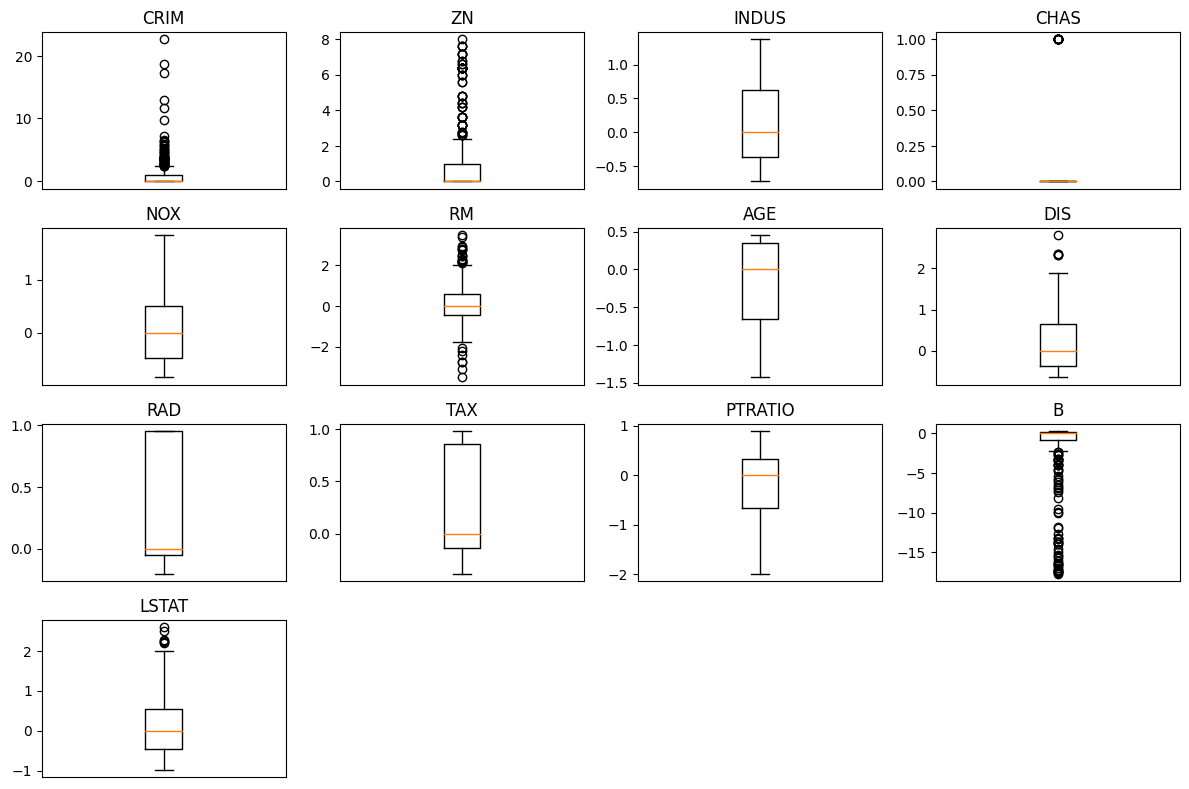

In [23]:
#Convertimos X_train_scaled en un DataFrame para poder graficar
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_d.columns)

plt.figure(figsize=(12, 8))
for i, column in enumerate(X_train_scaled_df.columns):
    plt.subplot(4, 4, i+1)
    plt.boxplot(X_train_scaled_df[column])
    plt.title(column)
    plt.xticks([])
plt.tight_layout()
plt.show()

## Implementación de la solución del problema de regresión:

### Operaciones sobre los datos de testeo

In [24]:
X_test_scaled.shape, y_test.shape

((107, 13), (107,))

In [25]:
y_test

,MEDV
121,20.400000
136,14.400000
158,49.000536
250,24.400000
87,18.700000
...,...
331,23.000000
387,20.500000
378,19.500000
555,21.200000


In [26]:
X_test_scaled

array([[-3.84891891e-02,  0.00000000e+00, -1.03315343e-01, ...,
         5.49618321e-01, -1.71092779e-01,  2.39488567e-01],
       [-7.12526081e-03,  0.00000000e+00, -2.30531997e-01, ...,
        -3.66412214e-01,  2.45225449e-01,  1.88394394e+00],
       [            nan,  1.28208161e+00,             nan, ...,
                    nan, -1.31787458e+01,             nan],
       ...,
       [-6.32582572e-02,  0.00000000e+00, -3.63145721e-01, ...,
         3.35877863e-01,  2.45225449e-01, -1.82444062e-01],
       [-1.08955782e-02,  0.00000000e+00, -1.61912105e-02, ...,
         3.05343511e-02,  2.45225449e-01,  1.24416031e-01],
       [-3.92943755e-02,  0.00000000e+00, -1.03315343e-01, ...,
         5.49618321e-01,  1.70188722e-01,  6.04868453e-02]])

In [27]:
#Vemos cantidad de filas que tienen al menos un dato faltante
X_test_scaled_df = pd.DataFrame(X_test_scaled, index=X_test.index)
filas_Xtest_con_nulos = X_test_scaled_df[X_test_scaled_df.isnull().any(axis=1)]
filas_Xtest_con_nulos.shape[0]

7

In [28]:
# Eliminación de datos faltantes en X_test
X_test_scaled_d = X_test_scaled_df.dropna()

# Nos guardamos los índices de las columnas que tienen datos nulos
indices_test = filas_Xtest_con_nulos.index.tolist()

# Eliminación de las filas correspondientes en y_test
y_test_d = y_test.drop(labels=indices_test)

print(X_test_scaled_d)
print(y_test_d)

           0    1         2    3         4         5         6         7   \
121 -0.038489  0.0 -0.103315  0.0 -0.099448 -0.083110  0.164569 -0.341020   
136 -0.007125  0.0 -0.230532  0.0 -0.497238 -1.058981  0.360116  0.836813   
250 -0.037288  0.0  0.053200  1.0 -0.270718 -0.167560 -0.340755  0.324269   
87  -0.015241  0.0  0.008481  0.0  0.049724 -0.130027  0.362052 -0.207259   
356  2.041213  0.0  0.632228  1.0  0.718232 -0.420912  0.249758 -0.653047   
..        ...  ...       ...  ...       ...       ...       ...       ...   
331  1.416685  0.0  0.632228  0.0 -0.033149  0.071046 -0.232333  0.068122   
387 -0.048249  0.0  1.214341  0.0  0.237569 -0.305630  0.313650 -0.352178   
378 -0.063258  0.0 -0.363146  0.0 -0.127072 -0.428954 -0.588577  0.636013   
555 -0.010896  0.0 -0.016191  0.0  0.259669 -0.227882 -0.220716 -0.250913   
396 -0.039294  0.0 -0.103315  0.0 -0.099448  0.382038  0.394966 -0.243433   

       8         9         10        11        12  
121  0.00  0.128571  0.

### **LinearRegression**

In [29]:
lr_sklearn = LinearRegression()

lr_sklearn.fit(X_train_scaled, y_train_d)  # Se entrena el modelo utilizando los datos de entrenamiento

pendientes = lr_sklearn.coef_
intercepto = lr_sklearn.intercept_
pendientes, intercepto

(array([-0.45356963,  0.65244909,  0.44454069,  2.43873929, -4.09619437,
         2.50637784,  0.20776278, -5.52646508,  6.58132257, -5.35327021,
        -3.25034801,  0.1666817 , -5.66340817]),
 23.09183269060169)

RMSE de testeo: 2.2003052551625473
RMSE de entrenamiento: 2.16034992690713


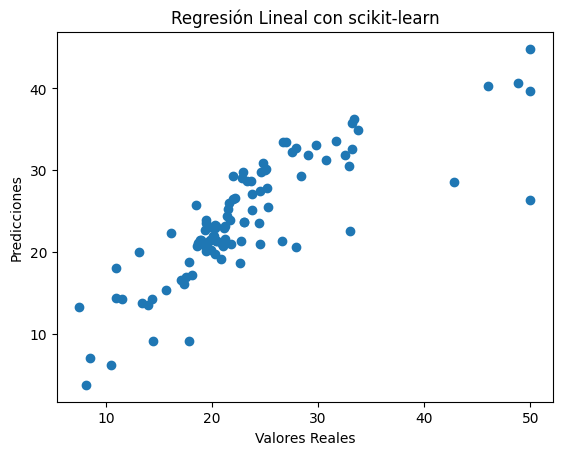

In [ ]:
y_pred_test = lr_sklearn.predict(X_test_scaled_d) # Predicciones en los datos de prueba.
y_pred_train = lr_sklearn.predict(X_train_scaled)

rmse_lr_test = np.sqrt(mean_squared_error(y_test_d, y_pred_test, squared = False))
rmse_lr_train= np.sqrt(mean_squared_error(y_train_d, y_pred_train, squared = False))

print("RMSE de testeo:", rmse_lr_test) # Imprime el RMSE y se ven las predicciones
print("RMSE de entrenamiento:", rmse_lr_train) # Imprime el RMSE y se ven las predicciones

# Gráfico de las predicciones
plt.scatter(y_test_d, y_pred_test)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Regresión Lineal con scikit-learn")
plt.show()

### **Gradiente descendiente**

In [30]:
def mini_batch_gradient_descent(X_train, y_train, X_test, y_test, lr=0.01, epochs=100, batch_size=11):
    """
    shapes:
        X_train = nxm
        y_train = nx1
        X_test = pxm
        y_test = px1
        W = (m+1)x1
    """
    n = X_train.shape[0]
    m = X_train.shape[1]

    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

    W = np.random.randn(m + 1).reshape(-1, 1)

    train_errors = []
    test_errors = []

    for i in range(epochs):

        # Permutación aleatoria de los datos
        permutation = np.random.permutation(n)
        X_train = X_train[permutation]
        y_train = y_train[permutation]


        for j in range(0, n, batch_size):
            # Obtener un lote (mini-batch) de datos
            x_batch = X_train[j:j+batch_size, :]
            y_batch = y_train[j:j+batch_size].reshape(-1, 1)

            prediction = np.matmul(x_batch, W)
            error = y_batch - prediction
            train_mse = np.mean(error ** 2)
            train_errors.append(train_mse)

            gradient = -2 * np.matmul(x_batch.T, error) / batch_size

            W = W - (lr * gradient)

            prediction_test = np.matmul(X_test, W) #matmul es .dot (prod escalar)
            error_test = y_test - prediction_test
            test_mse = np.mean(error_test ** 2)
            test_errors.append(test_mse)

    plt.figure(figsize=(10, 6))
    plt.plot(train_errors, label='Error de entrenamiento')
    plt.plot(test_errors, label='Error de prueba')
    plt.xlabel('Iteración')
    plt.ylabel('Error cuadrático medio')
    plt.legend()
    plt.title('Error de entrenamiento y prueba vs iteraciones (Mini-Batch GD)')
    plt.show()

    return W

In [31]:
X_train_scaled.shape, X_test_scaled_d.shape, y_train_d.shape, y_test_d.shape

((406, 13), (100, 13), (406,), (100,))

In [32]:
# Ajustamos las dimensiones de los vectores de variable respuesta de entrenamiento y testeo
y_train_d = y_train_d.to_numpy().reshape(-1, 1)
y_test_d = y_test_d.to_numpy().reshape(-1,1)

In [33]:
len(X_train_scaled)**0.5

20.149441679609886

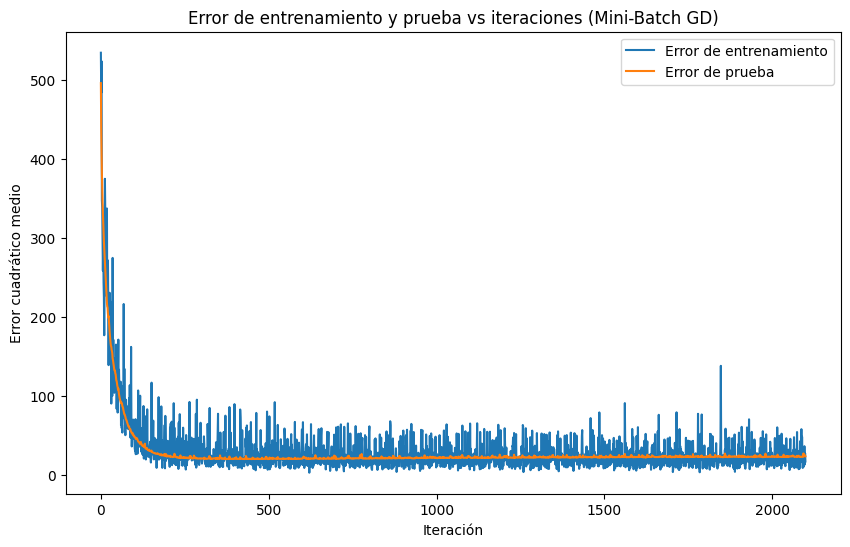

array([[23.16534962],
       [-0.55161884],
       [ 0.6148932 ],
       [-0.5705056 ],
       [ 2.68153851],
       [-3.67209647],
       [ 2.61088023],
       [-0.06597796],
       [-5.37369157],
       [ 3.5993412 ],
       [-2.09916217],
       [-3.152522  ],
       [ 0.13721456],
       [-5.5672026 ]])

In [34]:
#Variamos hiperparámetros de gradiente descendiente mini batch
mini_batch_gradient_descent(X_train_scaled, y_train_d, X_test_scaled_d, y_test_d, batch_size=20)

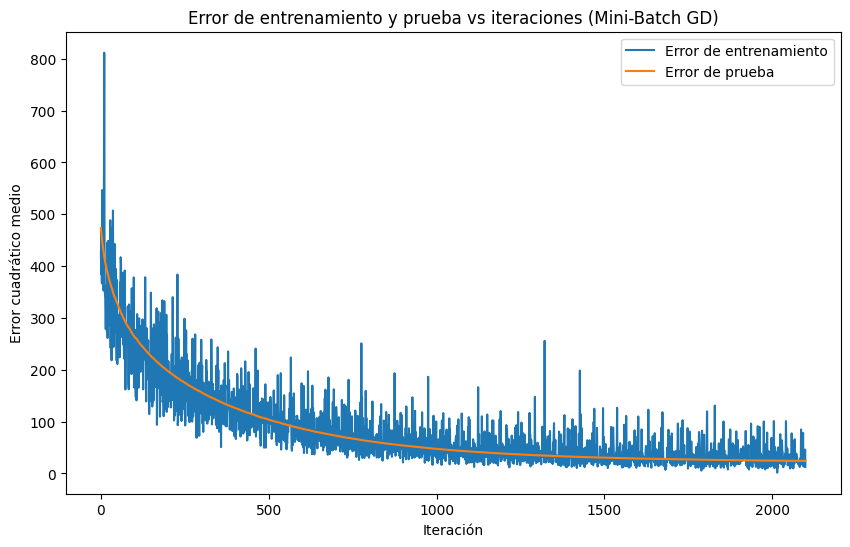

array([[19.69647111],
       [-0.27113597],
       [ 0.23974169],
       [ 0.7627879 ],
       [ 0.8215685 ],
       [-0.29830487],
       [ 4.16781205],
       [-2.03015594],
       [-0.31947692],
       [ 1.31020785],
       [ 1.96261903],
       [-4.47878618],
       [ 0.22780887],
       [-3.19568716]])

In [ ]:
mini_batch_gradient_descent(X_train_scaled, y_train_d, X_test_scaled_d, y_test_d, lr=0.001, batch_size=20)

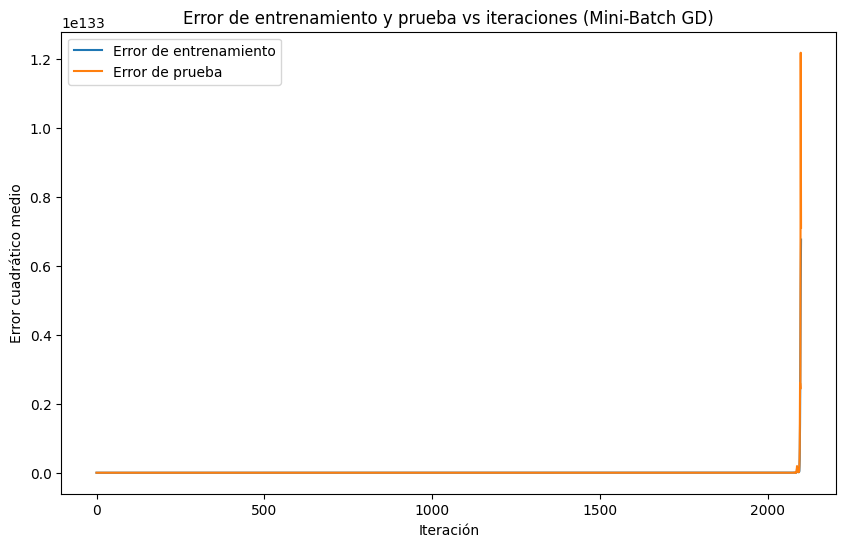

array([[ 4.07243349e+64],
       [ 1.35307593e+65],
       [-1.16233880e+63],
       [ 1.98428328e+64],
       [ 4.43862763e+63],
       [ 2.95021988e+64],
       [ 7.66418367e+64],
       [ 1.79967321e+64],
       [-1.79158401e+63],
       [ 2.64809555e+64],
       [ 2.49486371e+64],
       [ 8.43422410e+63],
       [-6.81885446e+65],
       [-4.06901156e+63]])

In [ ]:
mini_batch_gradient_descent(X_train_scaled, y_train_d, X_test_scaled_d, y_test_d, lr=0.05, batch_size=20)

Se observa que al disminuir el ratio de aprendizaje de 0,01 a 0,001 la gráfica de los errores converge más lentamente y presenta más ruido. En cambio, cuando se aumenta este hiperparámetro a 0,05 el algoritmo diverge.

### **Regularización**

In [39]:
# Crear modelos de regresión lineal, Lasso y Ridge
lassoCV = LassoCV(alphas=np.logspace(-3, 6, 200))  # alpha controla la fuerza de la regularización L1 (Lasso)
ridgeCV = RidgeCV(alphas=np.logspace(-3, 6, 200))  # alpha controla la fuerza de la regularización L2 (Ridge)
elasticnetCV = ElasticNetCV()

# Ajustar modelos a los datos
lassoCV.fit(X_train_scaled, y_train_d)
ridgeCV.fit(X_train_scaled, y_train_d)
elasticnetCV.fit(X_train_scaled,y_train_d)

#Mostrar alphas
print(lassoCV.alpha_)
print(ridgeCV.alpha_)
print(elasticnetCV.alpha_ )

# Mostrar coeficientes
print("\nCoeficientes del modelo Lasso:")
print(lassoCV.coef_)
print(lassoCV.intercept_)
print(lassoCV.score(X_train_scaled,y_train_d))


print("\nCoeficientes del modelo Ridge:")
print(ridgeCV.coef_)
print(ridgeCV.intercept_)
print(ridgeCV.score(X_train_scaled,y_train_d))


print("\nCoeficientes del modelo ElasticNet:")
print(elasticnetCV.coef_)
print(elasticnetCV.intercept_)
print(elasticnetCV.score(X_train_scaled,y_train_d))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.005872786613189483
0.6368249944718586
0.02739885215600974

Coeficientes del modelo Lasso:
[-0.44602454  0.63103199  0.21668303  2.36310017 -3.96083348  2.53202647
  0.12709925 -5.49410477  6.05049803 -4.78198475 -3.20864763  0.16706427
 -5.63007633]
23.110488913219534
0.7509946170306183

Coeficientes del modelo Ridge:
[[-0.444578    0.63047596  0.25831161  2.40475624 -3.98191822  2.54538637
   0.17289378 -5.44985101  5.91811208 -4.66569477 -3.21029746  0.16723974
  -5.62026786]]
[23.10985411]
0.7509603903573788

Coeficientes del modelo ElasticNet:
[-0.39481078  0.51686222 -0.29361753  1.82837891 -3.17603513  2.78964756
 -0.         -4.71989274  2.92446476 -1.91322251 -2.94849722  0.17598333
 -5.31984579]
23.16136360484304
0.7454590211972713


In [36]:
# Obtenemos las predicciones con Lasso y calculamos rmse:
y_pred_lasso_test = lassoCV.predict(X_test_scaled_d)

rmse_lasso_test = np.sqrt(mean_squared_error(y_test_d, y_pred_lasso_test, squared = False))

y_pred_lasso_train = lassoCV.predict(X_train_scaled)

rmse_lasso_train = np.sqrt(mean_squared_error(y_train_d, y_pred_lasso_train, squared = False))

# Obtenemos las predicciones con Ridge y calculamos rmse:
y_pred_ridge_test = ridgeCV.predict(X_test_scaled_d)

rmse_ridge_test = np.sqrt(mean_squared_error(y_test_d, y_pred_ridge_test, squared = False))

y_pred_ridge_train = ridgeCV.predict(X_train_scaled)

rmse_ridge_train = np.sqrt(mean_squared_error(y_train_d, y_pred_ridge_train, squared = False))

# Obtenemos las predicciones con ElasticNet y calculamos rmse:
y_pred_elasticnet_test = elasticnetCV.predict(X_test_scaled_d)

rmse_elasticnet_test = np.sqrt(mean_squared_error(y_test_d, y_pred_elasticnet_test, squared = False))

y_pred_elasticnet_train = elasticnetCV.predict(X_train_scaled)

rmse_elasticnet_train = np.sqrt(mean_squared_error(y_train_d, y_pred_elasticnet_train, squared = False))

print(f"""Los errores (rmse) para cada método de regularización son los siguientes: \n
          LASSO \n - rmse test: {rmse_lasso_test} \n - rmse train: {rmse_lasso_train} \n
          RIDGE \n - rmse test: {rmse_ridge_test} \n - rmse train: {rmse_ridge_train} \n
          ELASTICNET \n - rmse test: {rmse_elasticnet_test} \n - rmse train: {rmse_elasticnet_train}""")

Los errores (rmse) para cada método de regularización son los siguientes: 

          LASSO 
 - rmse test: 2.1960912252574496 
 - rmse train: 2.1606035061240823 

          RIDGE 
 - rmse test: 2.1951153218731885 
 - rmse train: 2.1606777479515635 

          ELASTICNET 
 - rmse test: 2.1742261157572735 
 - rmse train: 2.172512680561465


Los errores rmse de testeo y entrenamiento en todos los casos son muy similares entre sí, lo que implicaría que no hay overfitting.

## Optimización de hiperparámetros

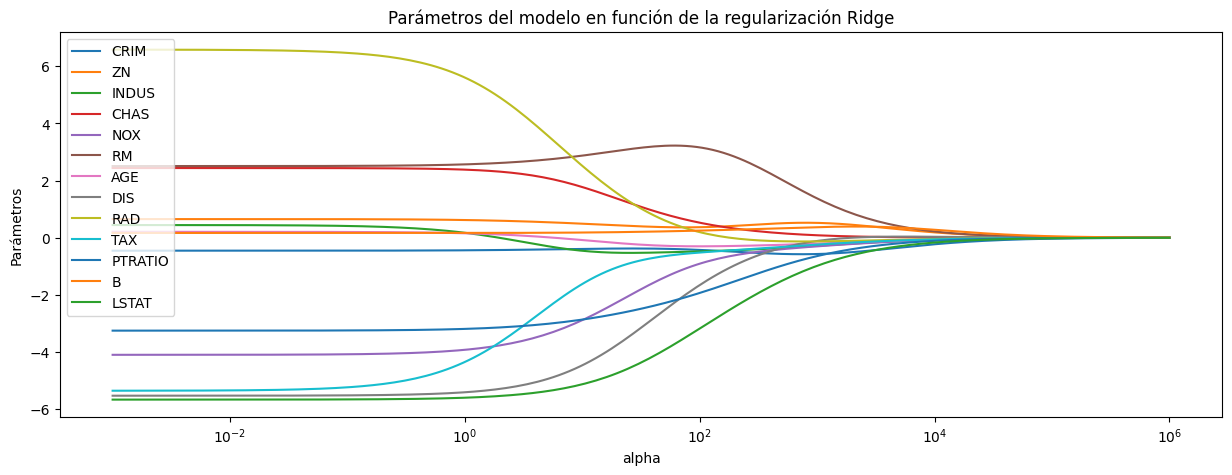

In [37]:
#Variación de hiperparámetro para Ridge
alphas = ridgeCV.alphas
coefs = []

for alpha in alphas:
    modelo_aux = RidgeCV(alphas=alpha)
    modelo_aux.fit(X_train_scaled, y_train_d)
    coefs.append(modelo_aux.coef_.flatten())

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(alphas, coefs, label=X_train.columns)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('Parámetros')
ax.set_title('Parámetros del modelo en función de la regularización Ridge');
plt.axis('tight')
plt.legend()
plt.show()

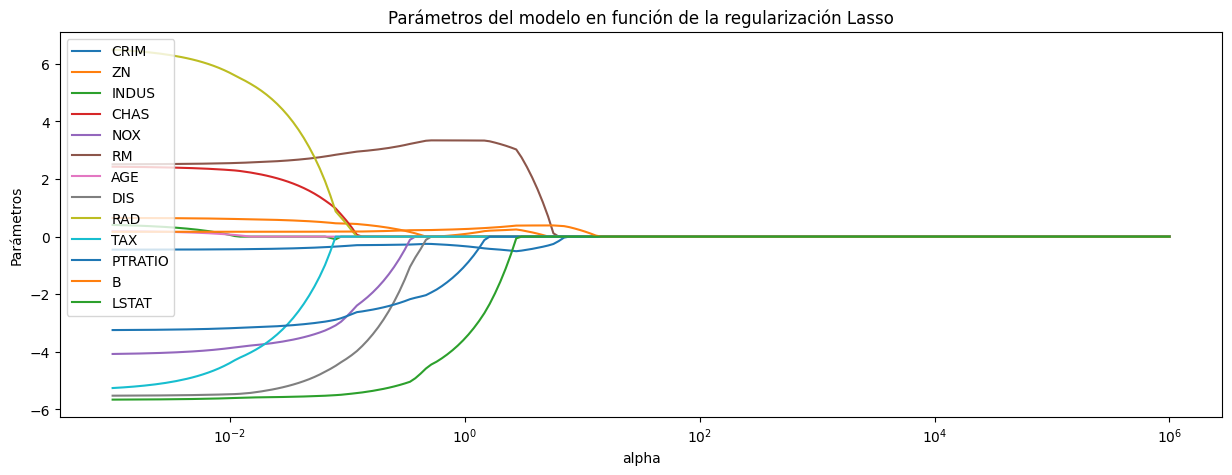

In [38]:
#Variación de hiperparámetro para Lasso
alphas = lassoCV.alphas
coefs = []

for alpha in alphas:
    modelo_aux = Lasso(alpha=alpha)
    modelo_aux.fit(X_train_scaled, y_train_d)
    coefs.append(modelo_aux.coef_.flatten())

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(alphas, coefs, label=X_train.columns)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('Parámetros')
ax.set_title('Parámetros del modelo en función de la regularización Lasso');
plt.axis('tight')
plt.legend()
plt.show()

Se puede observar que los valores de los parámetros convergen a 0 más rápidamente en Lasso que en Ridge, en Lasso lo hacen para un alpha cercano a 10, mientras que en Ridge lo hacen para alpha mayor a 10^4.


## Comparación de modelos

Luego de probar todos los métodos, vemos que en todos los casos los errores de testeo y entrenamiento obtenidos son muy cercanos entre sí, esto quiere decir que los modelos están generalizando bien y no presentan overfitting ni underfitting. Por lo que podemos decir que son modelos robustos.

Además, los coeficientes de la ecuación son similares en todos los modelos, así como el intercepto.

Considerando estas similitudes, aplicando el principio de parsimonia, podríamos optar por el método de Regresión Lineal por ser el más simple


## Conclusión

A través del desarrollo de este trabajo práctico, aplicamos diferentes librerías y exploramos las distintas herramientas. En primer lugar cargamos los datos y tuvimos que tomar decisiones para la manipulación de los mismos, tanto antes como después de realizar la división de los datos para la validación cruzada. Hicimos un análisis descriptivo, observando la relación entre algunas variables.
En última instancia, aplicamos distintos métodos de regresión, para elegir el mejor modelo que se ajuste a los datos.
Para concluir, nos pareció un interesante trabajo, nos demandó más tiempo del pensado pero revisando conceptos y sugerencias de las clases tomadas hasta el momento pudimos concretar la entrega del mismo.